**bold text**# ** Employee Burnout Prediction**
 Employee burnout is a state of physical, e ional and mental exhaustion caused by excessive and prolonged stress. It can have serious consequences on an individual's well-being and can lead to decreased productivity and job performance. In today's fast-paced and constantly connected world, it is increasingly important to recognize and address the signs of burnout in order to maintain the health and well-being of employees.

 we will be exploring the use of regression techniques to predict employee burnout. By analyzing a dataset containing various factors that may contribute to burnout such as workload, mental fatigue job and work-life balance, we can develop a model to identify individuals who may be at risk of burnout. By proactively addressing these risk factors, organizations can help prevent burnout and promote the well-being of their employees.
 Dataset: Are Your Employees Burning Out?

# This dataset consists of 9 columns as follows:

**Employee ID:** The unique ID allocated for each employee **(example: fffe390032003000)**

**Date of Joining:** The date-time when the employee has joined the organization **(example: 2008-12-30)**

**Gender.** The gender of the employee **(Male/Female)**

**Company Type:** The type of company where the employee is working **(Service/Product)**

**WFH Setup Available:** Is the work from home facility available for the employee (Yes/No)

**Designation :** The designation of the employee of work in the organization. In the range of [0.0, 5.0] bigger is higher designation.

**Resource Allocation:** The amount of resource allocated to the employee to work, ie. number of working hours. In the range of [1.0, 10.0]
• Mental Fatigue Score: The level of fatigue mentally the employee is facing. In the range of [0.0, 10.0] where 0.0 means fatigue and 10.0 means completely fatigue.


**Burn Rate:** The value we need to predict to each employee telling the rate of Bur out while working. In the range of [0.0, 1.0] where the higher the value is more is the burn out.


# IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


# LOADING DATASET

In [ ]:
data=pd.read_excel("/content/employee_burnout_analysis-AI.xlsx")

# DATA OVERVIEW

In [ ]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
data.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [ ]:
data.shape

(22750, 9)

## Column Information

In [ ]:
data.columns.values

array(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
data.dtypes

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [ ]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


## Finding Missing Values

#### data.isna().sum()
#### isna()//method to check any null values are there or missing values in the data set
#### sum() //calculate the count of null values in data
#### mean #median #mode #arbitarary #empty values

In [ ]:
data.isna().sum().any()

True

In [ ]:
data.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

# Exploratory Data Analysis

There are NaN values on our target ("Burn Rate") eriti also in Resource Allocation and Mental Fatigue Score columns. As we are going to perform supervised linear regression, our target variable is needed to do so. Therefore, this 1124 rows with NaN values must be dropped off of our dataframe.

In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Name: Burn Rate, dtype: float64

### Inputting missing values with mostly appeared value i.e. 'S' for Resource Allocation column

In [ ]:
data['Resource Allocation'].fillna(data['Resource Allocation'].mode()[0], inplace=True)

### Inputting missing values with mostly appeared value i.e. 'S' for Mental Fatigue Score column

In [ ]:
data['Mental Fatigue Score'].fillna(data['Mental Fatigue Score'].mode()[0], inplace=True)

### Inputting missing values with mostly appeared value i.e. 'S' for Burn Rate column

In [ ]:
data['Burn Rate'].fillna(data['Burn Rate'].mode()[0], inplace=True)

In [ ]:
data.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

### Calculate the all indivials values of categories in data set

In [ ]:
print(data['Employee ID'].value_counts())

Employee ID
fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: count, Length: 22750, dtype: int64


In [ ]:
print(data['Date of Joining'].value_counts())

Date of Joining
2008-01-06    86
2008-05-21    85
2008-02-04    82
2008-07-16    81
2008-07-13    80
              ..
2008-06-27    44
2008-07-06    44
2008-07-04    43
2008-12-24    43
2008-12-07    39
Name: count, Length: 366, dtype: int64


In [ ]:
print(data['Gender'].value_counts())

Gender
Female    11908
Male      10842
Name: count, dtype: int64


In [ ]:
print(data['Company Type'].value_counts())

Company Type
Service    14833
Product     7917
Name: count, dtype: int64


In [ ]:
print(data['WFH Setup Available'].value_counts())

WFH Setup Available
Yes    12290
No     10460
Name: count, dtype: int64


In [ ]:
print(data['Designation'].value_counts())

Designation
2    7588
3    5985
1    4881
4    2391
0    1507
5     398
Name: count, dtype: int64


In [ ]:
print(data['Resource Allocation'].value_counts())

Resource Allocation
4.0     5274
5.0     3861
3.0     3192
6.0     2943
2.0     2075
7.0     1965
1.0     1791
8.0     1044
9.0      446
10.0     159
Name: count, dtype: int64


In [ ]:
print(data['Mental Fatigue Score'].value_counts())

Mental Fatigue Score
6.0    2587
5.8     464
5.9     458
6.1     457
6.3     454
       ... 
0.5      24
0.2      23
0.4      19
0.1      17
0.3      13
Name: count, Length: 101, dtype: int64


In [ ]:
print(data['Burn Rate'].value_counts())

Burn Rate
0.47    1599
0.43     444
0.41     434
0.45     431
0.50     428
        ... 
0.98      18
0.97      17
0.95      17
0.96      13
0.99       8
Name: count, Length: 101, dtype: int64


In [ ]:
data.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

# PAIRPLOTTING

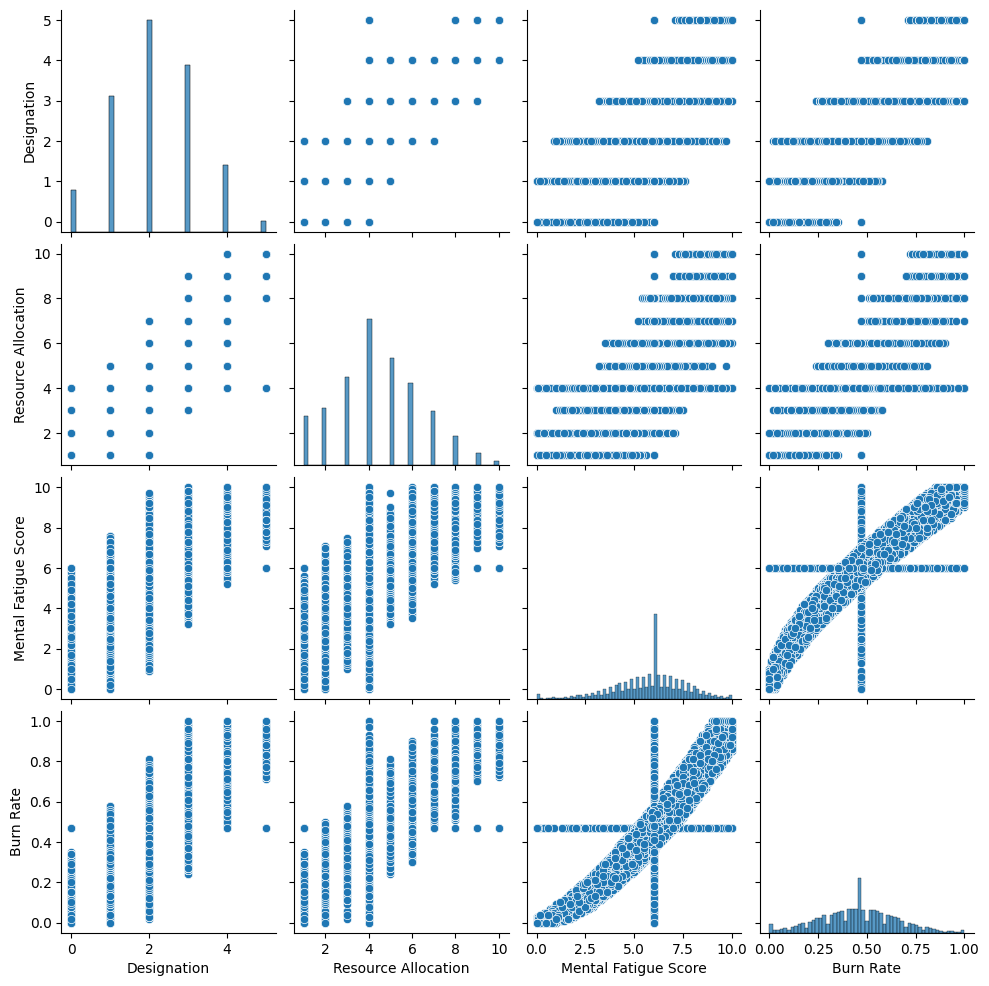

In [ ]:
sns.pairplot(data)
plt.show()

# Plotting Hisplot

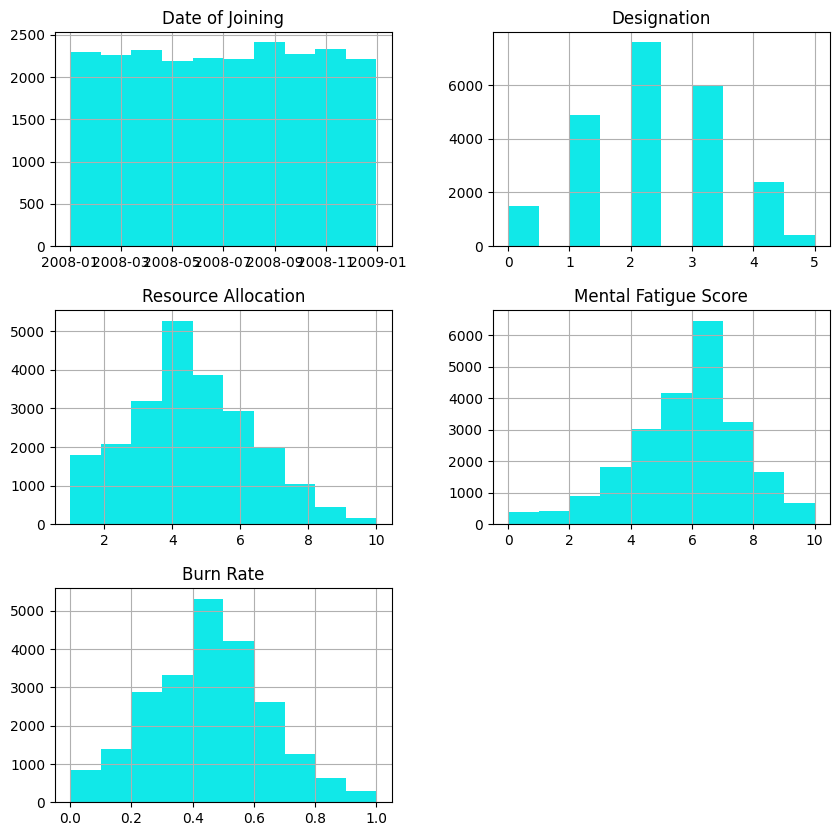

In [ ]:
data.hist(figsize=(10,10),color='#11E8E8')
plt.show()

# Bargraph plotting for different Categories

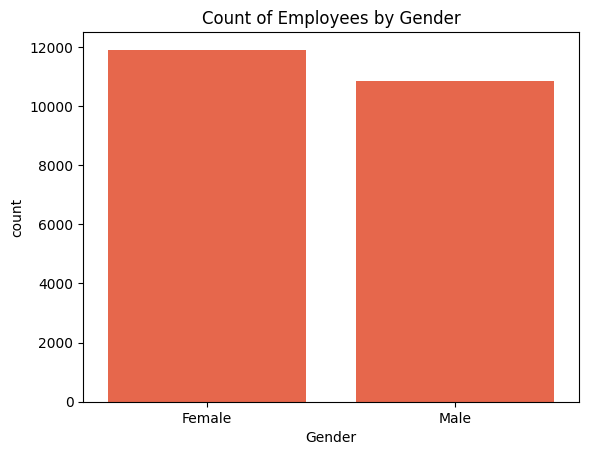

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing 'Gender' column
sns.countplot(x='Gender', data=data,color='#FF5733')
plt.title('Count of Employees by Gender')
plt.show()

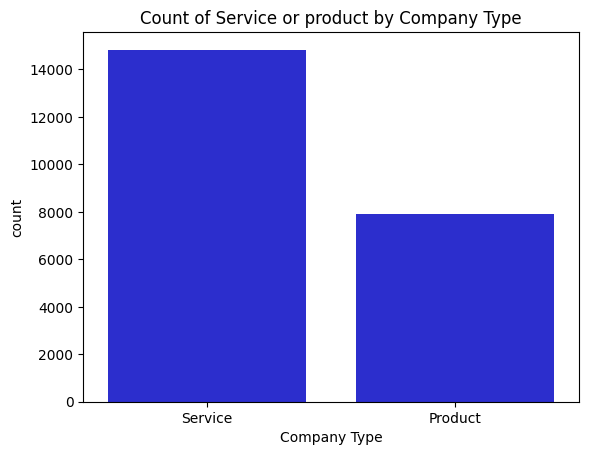

In [ ]:
sns.countplot(x='Company Type', data=data,color='#1114E8')
plt.title('Count of Service or product by Company Type')
plt.show()

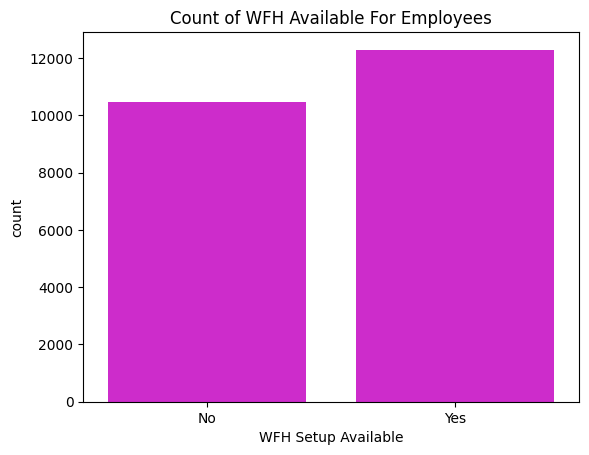

In [ ]:
# WFH = (Work from Home)
sns.countplot(x='WFH Setup Available', data=data,color='#E811E5')
plt.title('Count of WFH Available For Employees')
plt.show()

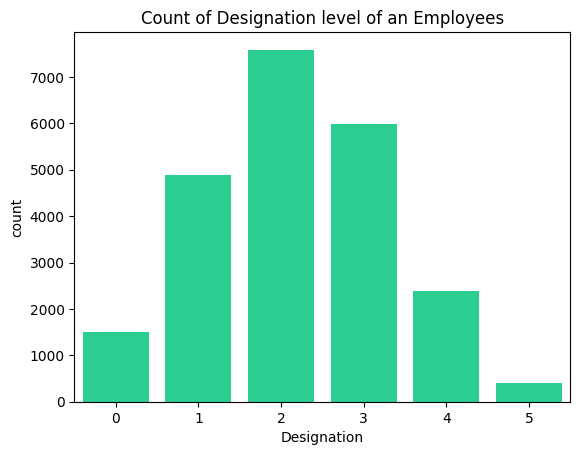

In [ ]:
# designation of an employee refers to the job title or position held by the employee within an organization.
sns.countplot(x='Designation', data=data,color='#11E898')
plt.title('Count of Designation level of an Employees')
plt.show()

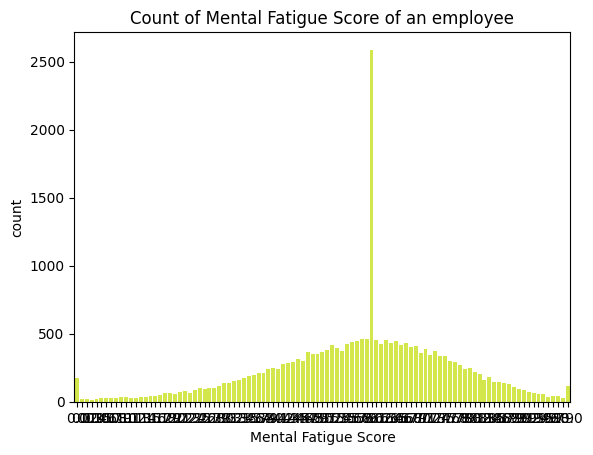

In [ ]:
# The term "Mental Fatigue Score" typically refers to a quantitative measure or
# rating that assesses the level of mental tiredness or exhaustion experienced by an individual.
sns.countplot(x='Mental Fatigue Score', data=data,color='#E6FF33')
plt.title('Count of Mental Fatigue Score of an employee')
plt.show()

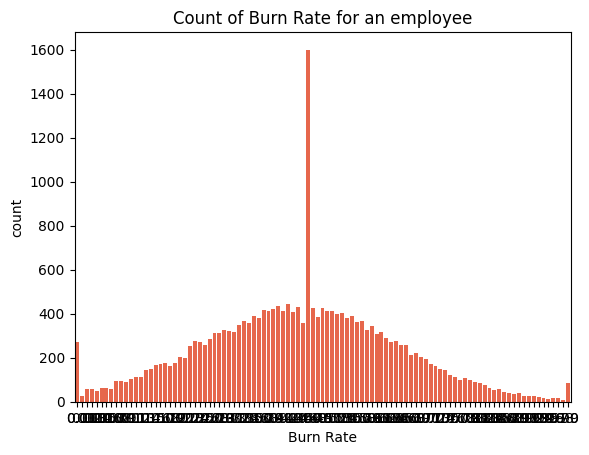

In [ ]:
# "Burn Rate" can refer to the rate at which the body burns calories during physical activity.
sns.countplot(x='Burn Rate', data=data,color='#FF5733')
plt.title('Count of Burn Rate for an employee')
plt.show()

## Droping Cabing Column

In [ ]:
#we are removing one of the colum from edution to reducary we need remove education because machine canoot recogonice all the
#catogriacal values into numerical values for machine learning
#redundant info to remove
data=data.drop(columns=['Resource Allocation'])

In [ ]:
data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,6.9,0.52
...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,6.0,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,6.0,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.9,0.52


# Converting non-numeric data into binary categorical data

In [ ]:
# Identify columns with non-numeric data
non_numeric_columns = data.select_dtypes(include=['object']).columns
print(non_numeric_columns)

Index(['Employee ID', 'Gender', 'Company Type', 'WFH Setup Available'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Example: Label Encoding for binary categorical data
label_encoders = {}
for column in non_numeric_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Example: One-Hot Encoding for multi-class categorical data
# Uncomment the following line if you have multi-class categorical columns
# data = pd.get_dummies(data, columns=non_numeric_columns)

In [ ]:
data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Mental Fatigue Score,Burn Rate
0,7722,2008-09-30,0,1,0,2,3.8,0.16
1,21062,2008-11-30,1,1,1,1,5.0,0.36
2,2381,2008-03-10,0,0,1,2,5.8,0.49
3,10790,2008-11-03,1,1,1,1,2.6,0.20
4,6810,2008-07-24,0,1,0,3,6.9,0.52
...,...,...,...,...,...,...,...,...
22745,4208,2008-12-30,0,1,0,1,6.0,0.41
22746,14934,2008-01-19,0,0,1,3,6.7,0.59
22747,22181,2008-11-05,1,1,1,3,6.0,0.72
22748,16875,2008-01-10,0,1,0,2,5.9,0.52


# Converting datetime columns intoto numeric columns

In [ ]:
# Identify columns with non-numeric data
non_numeric_columns = data.select_dtypes(include=['object', 'datetime64']).columns
print(non_numeric_columns)

Index(['Date of Joining'], dtype='object')


In [ ]:
# Convert datetime columns to numeric
for column in data.select_dtypes(include=['datetime64']).columns:
    data[f'{column}_year'] = data[column].dt.year
    data[f'{column}_month'] = data[column].dt.month
    data[f'{column}_day'] = data[column].dt.day
    data = data.drop(columns=[column])

In [ ]:
data

,Employee ID,Gender,Company Type,WFH Setup Available,Designation,Mental Fatigue Score,Burn Rate,Date of Joining_year,Date of Joining_month,Date of Joining_day
0,7722,0,1,0,2,3.8,0.16,2008,9,30
1,21062,1,1,1,1,5.0,0.36,2008,11,30
2,2381,0,0,1,2,5.8,0.49,2008,3,10
3,10790,1,1,1,1,2.6,0.20,2008,11,3
4,6810,0,1,0,3,6.9,0.52,2008,7,24
...,...,...,...,...,...,...,...,...,...,...
22745,4208,0,1,0,1,6.0,0.41,2008,12,30
22746,14934,0,0,1,3,6.7,0.59,2008,1,19
22747,22181,1,1,1,3,6.0,0.72,2008,11,5
22748,16875,0,1,0,2,5.9,0.52,2008,1,10


# Plotting Correlation

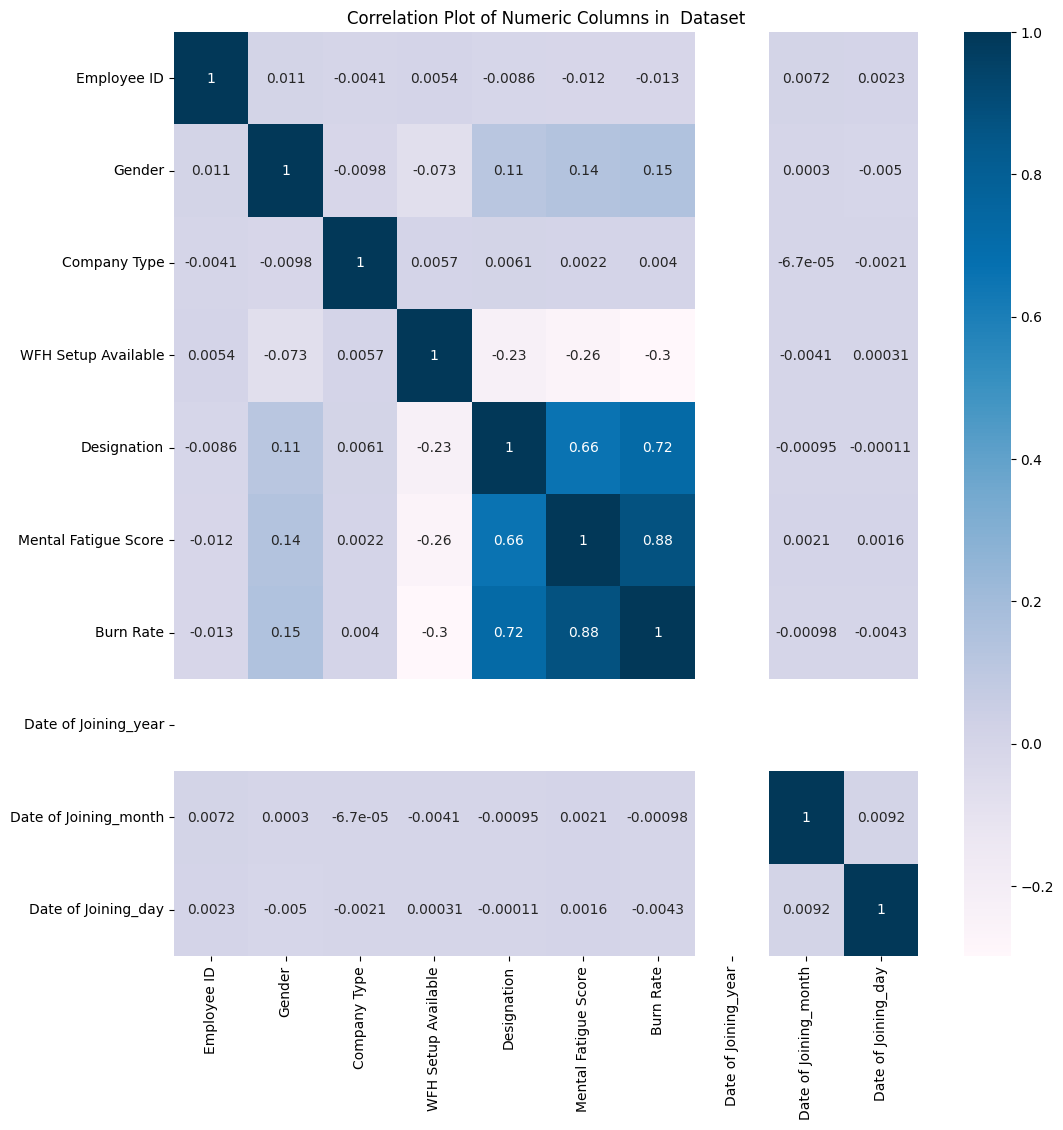

In [ ]:
# Plot the heatmap
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, cmap='PuBu')
plt.title('Correlation Plot of Numeric Columns in  Dataset')
plt.show()

# Plotting Box Plots(Out Layers)

**outlayers =**  it is deviating our results or it is extream data point soo we need to remove this with folloing sntaxa

**circles** are the outlayers are represent by circles from 80 to 90 because those cant work box represent most useful info

**line** for least useful info # average for most useful info is the **orange line**

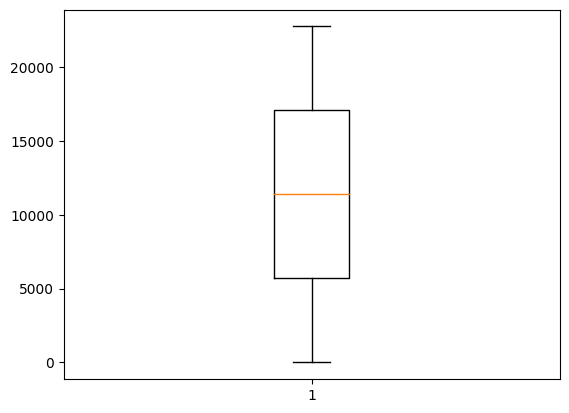

In [ ]:
import matplotlib.pyplot as plt # visualization technic to undrestand data set
plt.boxplot(data['Employee ID']) #numerical values
plt.show()

In [ ]:
data.head(2)

,Employee ID,Gender,Company Type,WFH Setup Available,Designation,Mental Fatigue Score,Burn Rate,Date of Joining_year,Date of Joining_month,Date of Joining_day
0,7722,0,1,0,2,3.8,0.16,2008,9,30
1,21062,1,1,1,1,5.0,0.36,2008,11,30


# Plotting Under Some different conditions

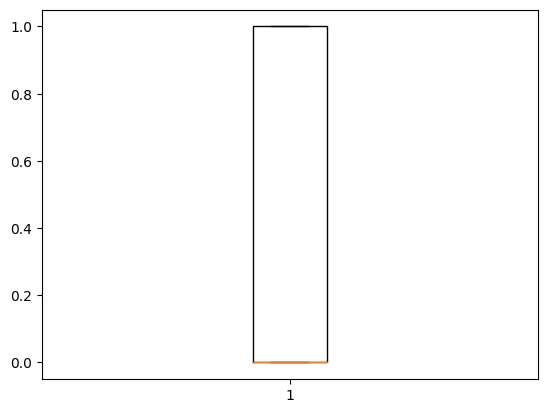

In [ ]:
import matplotlib.pyplot as plt # visualization technic to undrestand data set
plt.boxplot(data['Gender']) #numerical values
plt.show()

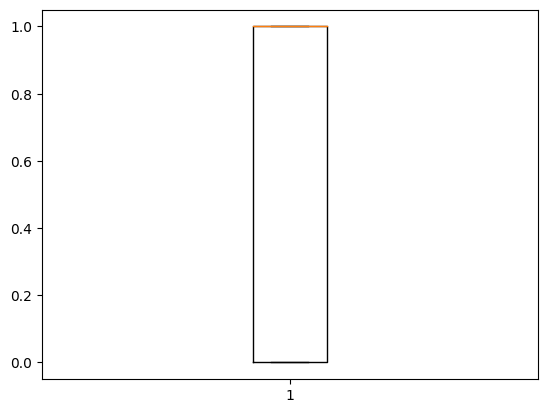

In [ ]:
plt.boxplot(data['Company Type']) #numerical values
plt.show()

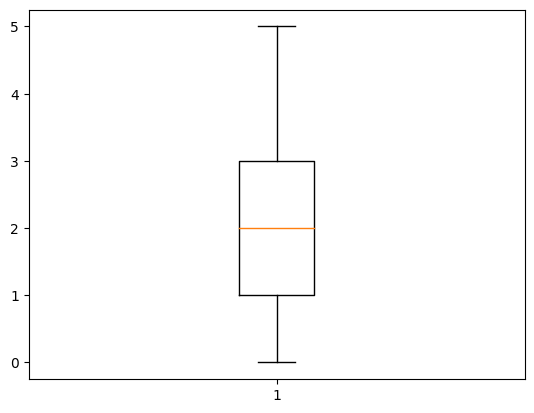

In [ ]:
plt.boxplot(data['Designation']) #numerical values
plt.show()

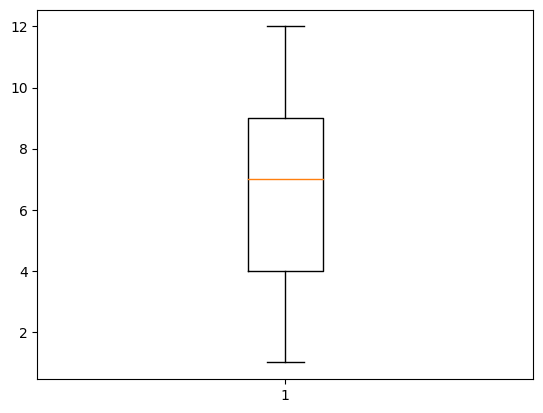

In [ ]:
plt.boxplot(data['Date of Joining_month']) #numerical values
plt.show()

In [ ]:
# we have 8 columns input and output
#feed my machine -- input and output separatly
#soo now i have to do
#7 columns as input
#income column as out put
x=data.drop(columns=['Burn Rate']) # input

In [ ]:
x

,Employee ID,Gender,Company Type,WFH Setup Available,Designation,Mental Fatigue Score,Date of Joining_year,Date of Joining_month,Date of Joining_day
0,7722,0,1,0,2,3.8,2008,9,30
1,21062,1,1,1,1,5.0,2008,11,30
2,2381,0,0,1,2,5.8,2008,3,10
3,10790,1,1,1,1,2.6,2008,11,3
4,6810,0,1,0,3,6.9,2008,7,24
...,...,...,...,...,...,...,...,...,...
22745,4208,0,1,0,1,6.0,2008,12,30
22746,14934,0,0,1,3,6.7,2008,1,19
22747,22181,1,1,1,3,6.0,2008,11,5
22748,16875,0,1,0,2,5.9,2008,1,10


In [ ]:
y=data['Burn Rate'] #output

In [ ]:
y

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64

In [ ]:
data

,Employee ID,Gender,Company Type,WFH Setup Available,Designation,Mental Fatigue Score,Burn Rate,Date of Joining_year,Date of Joining_month,Date of Joining_day
0,7722,0,1,0,2,3.8,0.16,2008,9,30
1,21062,1,1,1,1,5.0,0.36,2008,11,30
2,2381,0,0,1,2,5.8,0.49,2008,3,10
3,10790,1,1,1,1,2.6,0.20,2008,11,3
4,6810,0,1,0,3,6.9,0.52,2008,7,24
...,...,...,...,...,...,...,...,...,...,...
22745,4208,0,1,0,1,6.0,0.41,2008,12,30
22746,14934,0,0,1,3,6.7,0.59,2008,1,19
22747,22181,1,1,1,3,6.0,0.72,2008,11,5
22748,16875,0,1,0,2,5.9,0.52,2008,1,10


In [ ]:
if y.dtype.kind in 'fc':
    y = pd.cut(y, bins=2, labels=[0, 1])

In [ ]:
from sklearn.model_selection import train_test_split #training and testing 80-20
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=23,stratify=y)

In [ ]:
xtrain

,Employee ID,Gender,Company Type,WFH Setup Available,Designation,Mental Fatigue Score,Date of Joining_year,Date of Joining_month,Date of Joining_day
18956,3391,1,1,0,4,9.2,2008,10,12
2560,3729,0,0,1,2,4.4,2008,5,6
9607,9199,0,1,0,3,5.4,2008,4,7
15942,5155,1,1,1,0,3.3,2008,7,16
15061,5118,1,1,0,1,6.1,2008,5,8
...,...,...,...,...,...,...,...,...,...
12902,18740,1,0,0,3,5.4,2008,1,6
11751,1918,0,1,1,2,5.1,2008,10,31
18695,17171,0,0,1,0,3.7,2008,1,25
22202,1537,0,1,0,3,5.1,2008,8,7


In [ ]:
ytrain

18956    1
2560     0
9607     0
15942    0
15061    1
        ..
12902    0
11751    0
18695    0
22202    0
19702    1
Name: Burn Rate, Length: 18200, dtype: category
Categories (2, int64): [0 < 1]

# Data Prediction Methods

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create an instance of KNeighborsClassifier
knn = KNeighborsClassifier()
# Fit the model using the training data
knn.fit(xtrain, ytrain)
#training dataset

KNeighborsClassifier()

In [ ]:
predict1=knn.predict(xtest)  #testing input
predict1

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict1) #actual ouput vs predicted o/p

0.5835164835164836

In [ ]:
from sklearn.neural_network import MLPClassifier #image dataset - cnn
clf=MLPClassifier(solver='adam',alpha=1e-5,hidden_layer_sizes=(5,2),random_state=1,max_iter=3000)
clf.fit(xtrain,ytrain)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=3000,
              random_state=1)

In [ ]:
predict2=clf.predict(xtest)  #testing input
predict2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict2) #actual ouput vs predicted o/p

0.621978021978022

In [ ]:
#creating model set prdection process or binary cllassification process
# regression is to
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predict3=lr.predict(xtest)
predict3

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict3) #actual ouput vs predicted o/p

0.8876923076923077

# Conclusion
 Burnout syndrome is a common and important problem among health professionals that also has adverse effects on people's daily life, especially increasing the incidence of infection and trauma.
“When workers are suffering from burnout, their productivity drops, and they may become less innovative and more likely to make errors